In [1]:
#Importing necessary libraries
import pandas_profiling
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sb
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

[nltk_data] Downloading package wordnet to /Users/adwait/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/adwait/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#Reading the business data file
df_business = pd.read_json('business.json',lines=True)

In [3]:
df_business.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [4]:
#Extracting the number of unique business names from the business file
df_business['name'].nunique()

145046

In [5]:
#Dropping the unnecessary columns
df_business.drop('postal_code',inplace=True,axis = 1)
df_business.drop('latitude',inplace=True,axis = 1)
df_business.drop('longitude',inplace=True,axis = 1)
df_business.drop('stars',inplace=True,axis = 1)
df_business.drop('is_open',inplace=True,axis = 1)
df_business.drop('attributes',inplace=True,axis = 1)
df_business.drop('hours',inplace=True,axis = 1)

In [6]:
df_business.head(5)

,business_id,name,address,city,state,review_count,categories
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,5,"Golf, Active Life"
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,170,"Sushi Bars, Restaurants, Japanese"
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,3,"Insurance, Financial Services"
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,4,"Plumbing, Shopping, Local Services, Home Servi..."


In [7]:
#Reading the reviews file
reviews = pd.read_json('review.json',lines = True,chunksize=400000)
for r in reviews:
    review_subset = r
    break

In [8]:
#Making a copy of the reviews file
df_reviews = review_subset

In [9]:
df_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [10]:
#Getting the unique star ratings in the data file
df_reviews.stars.unique()

array([1, 5, 4, 3, 2])

In [11]:
#Dropping the unnecessary columns
df_reviews.drop('review_id',inplace=True,axis = 1)
df_reviews.drop('user_id',inplace=True,axis = 1)
df_reviews.drop('useful',inplace=True,axis = 1)
df_reviews.drop('funny',inplace=True,axis = 1)
df_reviews.drop('cool',inplace=True,axis = 1)

In [12]:
df_reviews.head()

,business_id,stars,text,date
0,ujmEBvifdJM6h6RLv4wQIg,1,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,NZnhc2sEQy3RmzKTZnqtwQ,5,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,WTqjgwHlXbSFevF32_DJVw,5,I have to say that this office really has it t...,2016-11-09 20:09:03
3,ikCg8xy5JIg_NGPx-MSIDA,5,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,b1b1eb3uo-w561D0ZfCEiQ,1,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [13]:
#Converting the star ratings columns from int to string
df_reviews['stars'].astype(str)

0         1
1         5
2         5
3         5
4         1
         ..
399995    5
399996    4
399997    4
399998    5
399999    5
Name: stars, Length: 400000, dtype: object

In [14]:
#Getting the count of each star rating
df_reviews['stars'].value_counts()

5    176594
4     88287
1     58491
3     44218
2     32410
Name: stars, dtype: int64

In [15]:
#Creating a label column which tells us whether the review is positive or negative based on the star ratings
df_reviews['Label'] = df_reviews['stars'].replace({1: 0,2: 0,3:0,4:1,5:1})

In [16]:
#Getting the count of positive and negative reviews in the dataset
df_reviews['Label'].value_counts()

1    264881
0    135119
Name: Label, dtype: int64

In [17]:
df_reviews.head()

,business_id,stars,text,date,Label
0,ujmEBvifdJM6h6RLv4wQIg,1,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,0
1,NZnhc2sEQy3RmzKTZnqtwQ,5,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1
2,WTqjgwHlXbSFevF32_DJVw,5,I have to say that this office really has it t...,2016-11-09 20:09:03,1
3,ikCg8xy5JIg_NGPx-MSIDA,5,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,1
4,b1b1eb3uo-w561D0ZfCEiQ,1,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,0


In [18]:
#Dropping the stars column
df_reviews.drop('stars',inplace=True,axis = 1)

In [19]:
df_reviews.head()

,business_id,text,date,Label
0,ujmEBvifdJM6h6RLv4wQIg,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,0
1,NZnhc2sEQy3RmzKTZnqtwQ,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1
2,WTqjgwHlXbSFevF32_DJVw,I have to say that this office really has it t...,2016-11-09 20:09:03,1
3,ikCg8xy5JIg_NGPx-MSIDA,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,1
4,b1b1eb3uo-w561D0ZfCEiQ,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,0


In [20]:
#Joining the business and the reviews data files using business ID column
frame = pd.merge(left = df_business,right = df_reviews,how='inner',on = 'business_id')

In [21]:
frame.head(5)

,business_id,name,address,city,state,review_count,categories,text,date,Label
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,5,"Golf, Active Life",Don't go here if you expect consistent or reas...,2015-09-24 00:02:23,0
1,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,5,"Golf, Active Life",Both courses are great! You can find reasonabl...,2016-04-02 03:41:15,1
2,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,5,"Golf, Active Life",Absolutely gorgeous facility. Golf course was...,2015-03-27 00:21:38,1
3,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30,0
4,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",We've always been there on a Sunday so we were...,2013-06-24 23:11:30,0


In [22]:
#Dropping the missing values
frame.dropna(inplace=True)

In [23]:
#Getting the structure of the newly merged dataframe
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399863 entries, 0 to 399999
Data columns (total 10 columns):
business_id     399863 non-null object
name            399863 non-null object
address         399863 non-null object
city            399863 non-null object
state           399863 non-null object
review_count    399863 non-null int64
categories      399863 non-null object
text            399863 non-null object
date            399863 non-null datetime64[ns]
Label           399863 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 33.6+ MB


In [24]:
#Extracting the reviews only related to Restaurant category as we are focussing only on Yelp restaurant reviews
frame['adwait'] =  frame['categories'].str.contains('Restaurants')

In [25]:
frame.head()

,business_id,name,address,city,state,review_count,categories,text,date,Label,adwait
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,5,"Golf, Active Life",Don't go here if you expect consistent or reas...,2015-09-24 00:02:23,0,False
1,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,5,"Golf, Active Life",Both courses are great! You can find reasonabl...,2016-04-02 03:41:15,1,False
2,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,5,"Golf, Active Life",Absolutely gorgeous facility. Golf course was...,2015-03-27 00:21:38,1,False
3,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30,0,True
4,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",We've always been there on a Sunday so we were...,2013-06-24 23:11:30,0,True


In [26]:
#Replacing the False values by null values to ignore them in the later stages
frame['adwait'] = frame['adwait'].replace({False:np.nan})

In [27]:
#Ignoring null values and considering only True values
restaurant = frame[frame['adwait'].notnull()]

In [28]:
#Dropping the unnecessary columns
restaurant.drop('adwait',axis = 1,inplace=True)

In [29]:
restaurant.Label.value_counts()

1    166920
0     87251
Name: Label, dtype: int64

In [30]:
#Dropping the unnecessary columns
restaurant.drop('business_id',axis = 1,inplace = True)

In [31]:
restaurant.reset_index()

,index,name,address,city,state,review_count,categories,text,date,Label
0,3,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30,0
1,4,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",We've always been there on a Sunday so we were...,2013-06-24 23:11:30,0
2,5,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...","***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22,0
3,6,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...","Horrible service,\nI went there tonight with m...",2014-05-09 02:38:43,0
4,7,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55,1
...,...,...,...,...,...,...,...,...,...,...
254166,399971,McDonald's,1807 W Craig Rd,North Las Vegas,NV,15,"Restaurants, Coffee & Tea, Fast Food, Burgers,...",I come to this McDonalds often and typically g...,2017-10-30 17:48:42,0
254167,399972,McDonald's,1807 W Craig Rd,North Las Vegas,NV,15,"Restaurants, Coffee & Tea, Fast Food, Burgers,...",Like the fact there's a play place at this loc...,2014-11-03 21:11:56,0
254168,399973,McDonald's,1807 W Craig Rd,North Las Vegas,NV,15,"Restaurants, Coffee & Tea, Fast Food, Burgers,...","I am So Sorry for doing this...but Yep, I have...",2016-01-23 19:22:58,0
254169,399974,McDonald's,1807 W Craig Rd,North Las Vegas,NV,15,"Restaurants, Coffee & Tea, Fast Food, Burgers,...","This place might be the worst Mcdonalds ever, ...",2018-08-11 00:07:29,0


In [32]:
restaurant.columns

Index(['name', 'address', 'city', 'state', 'review_count', 'categories',
       'text', 'date', 'Label'],
      dtype='object')

In [33]:
restaurant.head(5)

,name,address,city,state,review_count,categories,text,date,Label
3,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30,0
4,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",We've always been there on a Sunday so we were...,2013-06-24 23:11:30,0
5,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...","***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22,0
6,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...","Horrible service,\nI went there tonight with m...",2014-05-09 02:38:43,0
7,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55,1


In [34]:
#Dropping the unnecessary columns
restaurant.drop('review_count',axis = 1,inplace = True)

In [35]:
#Splitting the date into year and month columns
restaurant['Year'] = restaurant['date'].dt.year
restaurant['Month'] = restaurant['date'].dt.month

In [36]:
restaurant.head(5)

,name,address,city,state,categories,text,date,Label,Year,Month
3,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...",My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30,0,2017,1
4,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...",We've always been there on a Sunday so we were...,2013-06-24 23:11:30,0,2013,6
5,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...","***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22,0,2016,1
6,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...","Horrible service,\nI went there tonight with m...",2014-05-09 02:38:43,0,2014,5
7,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...",One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55,1,2011,3


In [37]:
#Creating a dataframe for actual sentiment analysis
df = restaurant.loc[:,['text','Label']]

In [38]:
df.head()

,text,Label
3,My girlfriend and I went for dinner at Emerald...,0
4,We've always been there on a Sunday so we were...,0
5,"***No automatic doors, not baby friendly!*** I...",0
6,"Horrible service,\nI went there tonight with m...",0
7,One of the gauges of a good Chinese restaurant...,1


In [39]:
#Removing the @user or user names from the reviews present if any
df['clean_text'] = df['text'].apply(lambda x : ' '.join([word for word in x.split() if not word.startswith('@')]))

In [40]:
df.head()

,text,Label,clean_text
3,My girlfriend and I went for dinner at Emerald...,0,My girlfriend and I went for dinner at Emerald...
4,We've always been there on a Sunday so we were...,0,We've always been there on a Sunday so we were...
5,"***No automatic doors, not baby friendly!*** I...",0,"***No automatic doors, not baby friendly!*** I..."
6,"Horrible service,\nI went there tonight with m...",0,"Horrible service, I went there tonight with my..."
7,One of the gauges of a good Chinese restaurant...,1,One of the gauges of a good Chinese restaurant...


In [41]:
#Dataframe containing only the positive reviews
df1 = df[df['Label']==1]

In [42]:
df1.head()

,text,Label,clean_text
7,One of the gauges of a good Chinese restaurant...,1,One of the gauges of a good Chinese restaurant...
8,"I've been a frequent at this place for years, ...",1,"I've been a frequent at this place for years, ..."
12,"Because we are in Mississauga, I think this pl...",1,"Because we are in Mississauga, I think this pl..."
14,Came on a weekday morning with bf to avoid the...,1,Came on a weekday morning with bf to avoid the...
16,The dimsum here is actually alright. Food was ...,1,The dimsum here is actually alright. Food was ...


In [43]:
#Considering a sample of 25k rows of positive reviews
df4 = df1.iloc[0:25000,:]
print(df4.shape)

(25000, 3)


In [44]:
#Dataframe containing only the negative reviews
df2 = df[df['Label']==0]
d = df2.iloc[0:25000,:]

In [45]:
#Merging the dataframes together
data_frame = pd.concat([df4,d],axis = 0)

In [46]:
#Removing all the greek/non-ASCII characters using unidecode library
data_frame['clean_text'] = data_frame['clean_text'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()])) 

In [47]:
data_frame.head()

,text,Label,clean_text
7,One of the gauges of a good Chinese restaurant...,1,One of the gauges of a good Chinese restaurant...
8,"I've been a frequent at this place for years, ...",1,"I've been a frequent at this place for years, ..."
12,"Because we are in Mississauga, I think this pl...",1,"Because we are in Mississauga, I think this pl..."
14,Came on a weekday morning with bf to avoid the...,1,Came on a weekday morning with bf to avoid the...
16,The dimsum here is actually alright. Food was ...,1,The dimsum here is actually alright. Food was ...


In [48]:
#Again making a copy of the dataframe
df = data_frame

In [49]:
#Shuffling the data
df = df.sample(frac=1).reset_index(drop=True)

In [50]:
df.head()

,text,Label,clean_text
0,Came here several times and I think it's OK. I...,0,Came here several times and I think it's OK. I...
1,I tried this place out because it was on DDD. ...,0,I tried this place out because it was on DDD. ...
2,I dont bother with the Pizza. I had it a few t...,0,I dont bother with the Pizza. I had it a few t...
3,Good tea. I like the. Roast duck. Sauces are...,0,Good tea. I like the. Roast duck. Sauces are s...
4,"Pretty good food, especially the tinga and the...",0,"Pretty good food, especially the tinga and the..."


In [51]:
#Taking care of slang words
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food','njoy':'enjoy!'} ## Need a huge dictionary
df['clean_text'] = df['clean_text'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))

In [52]:
#Tokenization and removing stopwords
corpus = []
ps = PorterStemmer()
for i in range(0,50000):
    tweet = df['clean_text'][i]
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [53]:
corpus

['came sever time think ok. idk peopl think great. qualiti food anyth special. waitress alway look like want there. well, want either!',
 'tri place ddd. place pretti cool realli friendli staff. reason loss 2 star thought food okay. anyth special. tomato soup, half sandwich, potato salad...th sandwich good howev soup cold potato salad bland. disappointment. desert great though! recommend place deserts.',
 'dont bother pizza. time never good. lucki never purchas one. stick item sell.',
 'good tea. like the. roast duck. sauc salti tasty. overpr lunch miss opportun consid fast service. servic average. larg select chines dishes. fresh ingredi crap shoot w/your cook. lot veggies.',
 'pretti good food, especi tinga quesadilla de flor de calabaza. sangria good, too. servic bit lack earli evening: seem like night spot. friendli peopl decent atmosphere.',
 'times. sandwich bit pricey get. $12 12" submarine. like offer free refills. also feel like furnitur fit atmosphere. tabl chair someth would

In [54]:
#Converting the cleaned review list to a dataframe
corpus1 = pd.DataFrame(corpus,columns=['review'])

In [55]:
corpus1.head()

,review
0,came sever time think ok. idk peopl think grea...
1,tri place ddd. place pretti cool realli friend...
2,dont bother pizza. time never good. lucki neve...
3,good tea. like the. roast duck. sauc salti tas...
4,"pretti good food, especi tinga quesadilla de f..."


In [56]:
df = pd.concat([df,corpus1],axis = 1)

In [57]:
df.head()

,text,Label,clean_text,review
0,Came here several times and I think it's OK. I...,0,Came here several times and I think it's OK. I...,came sever time think ok. idk peopl think grea...
1,I tried this place out because it was on DDD. ...,0,I tried this place out because it was on DDD. ...,tri place ddd. place pretti cool realli friend...
2,I dont bother with the Pizza. I had it a few t...,0,I dont bother with the Pizza. I had it a few t...,dont bother pizza. time never good. lucki neve...
3,Good tea. I like the. Roast duck. Sauces are...,0,Good tea. I like the. Roast duck. Sauces are s...,good tea. like the. roast duck. sauc salti tas...
4,"Pretty good food, especially the tinga and the...",0,"Pretty good food, especially the tinga and the...","pretti good food, especi tinga quesadilla de f..."


In [58]:
#Finding words with # attached to it
df['hash1'] = df['review'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))

In [59]:
df.head()

,text,Label,clean_text,review,hash1
0,Came here several times and I think it's OK. I...,0,Came here several times and I think it's OK. I...,came sever time think ok. idk peopl think grea...,
1,I tried this place out because it was on DDD. ...,0,I tried this place out because it was on DDD. ...,tri place ddd. place pretti cool realli friend...,
2,I dont bother with the Pizza. I had it a few t...,0,I dont bother with the Pizza. I had it a few t...,dont bother pizza. time never good. lucki neve...,
3,Good tea. I like the. Roast duck. Sauces are...,0,Good tea. I like the. Roast duck. Sauces are s...,good tea. like the. roast duck. sauc salti tas...,
4,"Pretty good food, especially the tinga and the...",0,"Pretty good food, especially the tinga and the...","pretti good food, especi tinga quesadilla de f...",


In [60]:
#Replacing the blank entries with No hashtags for reviews with no hashtags
x = df['hash1']
x = pd.DataFrame(x)
x[x['hash1'] == ''] = 'No hashtags'

In [61]:
x.hash1.value_counts()

No hashtags    49593
#1                69
#2                30
#                 15
#4                 9
               ...  
#totts4lif         1
#67                1
#11,               1
#gross             1
#bolt              1
Name: hash1, Length: 220, dtype: int64

In [62]:
#Renaming the hash coliumn
x = x.rename({'hash1':'Hashed_words'},axis = 'columns')

In [63]:
df = pd.concat([df,x],axis = 1)

In [64]:
df.head()

,text,Label,clean_text,review,hash1,Hashed_words
0,Came here several times and I think it's OK. I...,0,Came here several times and I think it's OK. I...,came sever time think ok. idk peopl think grea...,,No hashtags
1,I tried this place out because it was on DDD. ...,0,I tried this place out because it was on DDD. ...,tri place ddd. place pretti cool realli friend...,,No hashtags
2,I dont bother with the Pizza. I had it a few t...,0,I dont bother with the Pizza. I had it a few t...,dont bother pizza. time never good. lucki neve...,,No hashtags
3,Good tea. I like the. Roast duck. Sauces are...,0,Good tea. I like the. Roast duck. Sauces are s...,good tea. like the. roast duck. sauc salti tas...,,No hashtags
4,"Pretty good food, especially the tinga and the...",0,"Pretty good food, especially the tinga and the...","pretti good food, especi tinga quesadilla de f...",,No hashtags


In [65]:
df.drop('hash1',axis = 1,inplace = True)

In [66]:
df.head()

,text,Label,clean_text,review,Hashed_words
0,Came here several times and I think it's OK. I...,0,Came here several times and I think it's OK. I...,came sever time think ok. idk peopl think grea...,No hashtags
1,I tried this place out because it was on DDD. ...,0,I tried this place out because it was on DDD. ...,tri place ddd. place pretti cool realli friend...,No hashtags
2,I dont bother with the Pizza. I had it a few t...,0,I dont bother with the Pizza. I had it a few t...,dont bother pizza. time never good. lucki neve...,No hashtags
3,Good tea. I like the. Roast duck. Sauces are...,0,Good tea. I like the. Roast duck. Sauces are s...,good tea. like the. roast duck. sauc salti tas...,No hashtags
4,"Pretty good food, especially the tinga and the...",0,"Pretty good food, especially the tinga and the...","pretti good food, especi tinga quesadilla de f...",No hashtags


In [67]:
#Collecting all the positive and negative hash words in their respective list
hash_positive = []
hash_negative = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [68]:
# extracting hashtags from positive reviews
hash_negative = hashtag_extract(df['clean_text'][df['Label'] == 0])

# extracting hashtags from negative reviews
hash_positive = hashtag_extract(df['clean_text'][df['Label'] == 1])

# Converting a multidimensional list to a 1-D list
hash_positive = sum(hash_positive,[])
hash_negative = sum(hash_negative,[])


In [69]:
#Converting the lists into a key value pair where value tells the hash tagged word and value tells it's count
from collections import Counter
pos = Counter(hash_positive)
neg = Counter(hash_negative)

In [70]:
#List of positive hashtagged words
positive = ['ComeGetServed','ilovewingking','spicynoodlechallenge','ilovevegas','vegasdining','vegasfood','weekendinvegas','foodinlasvegas','BestofLasVegas','BurgerLover']

In [71]:
#List of negative hashtagged words
negative = ['Yuck','chickfila','FAIL','displeased','disappointed','toolittlesauce','FoodPoisoning','unacceptable','ThumbsDown','sadnoodles']

Normal words


(-0.5, 799.5, 499.5, -0.5)

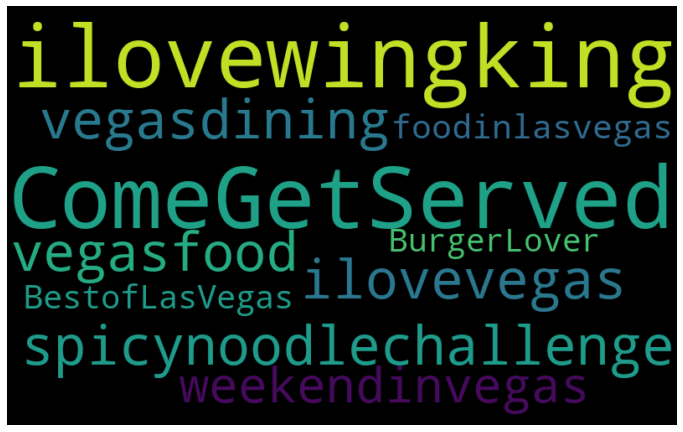

In [72]:
#Positive hash tagged words
#Words related to vegas have lot of positive reviews.Hence it can be said that restaurants in vegas are pretty good.
normal_words = ' '.join(positive)
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

Normal words


(-0.5, 799.5, 499.5, -0.5)

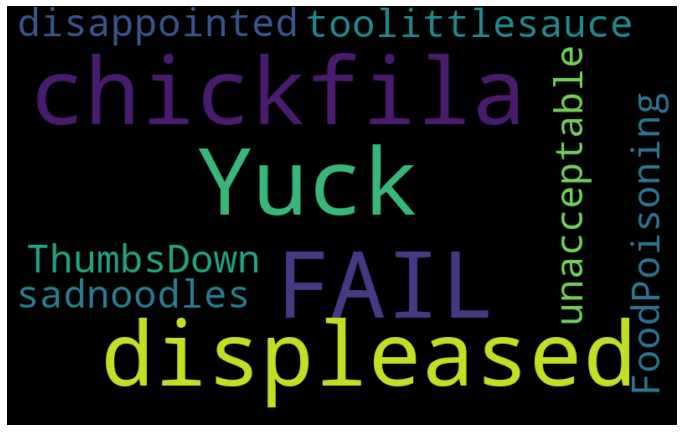

In [73]:
#Negative hash tagged words
normal_words = ' '.join(negative)
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

In [74]:
df.head(5)

,text,Label,clean_text,review,Hashed_words
0,Came here several times and I think it's OK. I...,0,Came here several times and I think it's OK. I...,came sever time think ok. idk peopl think grea...,No hashtags
1,I tried this place out because it was on DDD. ...,0,I tried this place out because it was on DDD. ...,tri place ddd. place pretti cool realli friend...,No hashtags
2,I dont bother with the Pizza. I had it a few t...,0,I dont bother with the Pizza. I had it a few t...,dont bother pizza. time never good. lucki neve...,No hashtags
3,Good tea. I like the. Roast duck. Sauces are...,0,Good tea. I like the. Roast duck. Sauces are s...,good tea. like the. roast duck. sauc salti tas...,No hashtags
4,"Pretty good food, especially the tinga and the...",0,"Pretty good food, especially the tinga and the...","pretti good food, especi tinga quesadilla de f...",No hashtags


In [75]:
print(df.shape)
df.head()

(50000, 5)


,text,Label,clean_text,review,Hashed_words
0,Came here several times and I think it's OK. I...,0,Came here several times and I think it's OK. I...,came sever time think ok. idk peopl think grea...,No hashtags
1,I tried this place out because it was on DDD. ...,0,I tried this place out because it was on DDD. ...,tri place ddd. place pretti cool realli friend...,No hashtags
2,I dont bother with the Pizza. I had it a few t...,0,I dont bother with the Pizza. I had it a few t...,dont bother pizza. time never good. lucki neve...,No hashtags
3,Good tea. I like the. Roast duck. Sauces are...,0,Good tea. I like the. Roast duck. Sauces are s...,good tea. like the. roast duck. sauc salti tas...,No hashtags
4,"Pretty good food, especially the tinga and the...",0,"Pretty good food, especially the tinga and the...","pretti good food, especi tinga quesadilla de f...",No hashtags


In [76]:
#List containing the cleaned reviews
corpus

['came sever time think ok. idk peopl think great. qualiti food anyth special. waitress alway look like want there. well, want either!',
 'tri place ddd. place pretti cool realli friendli staff. reason loss 2 star thought food okay. anyth special. tomato soup, half sandwich, potato salad...th sandwich good howev soup cold potato salad bland. disappointment. desert great though! recommend place deserts.',
 'dont bother pizza. time never good. lucki never purchas one. stick item sell.',
 'good tea. like the. roast duck. sauc salti tasty. overpr lunch miss opportun consid fast service. servic average. larg select chines dishes. fresh ingredi crap shoot w/your cook. lot veggies.',
 'pretti good food, especi tinga quesadilla de flor de calabaza. sangria good, too. servic bit lack earli evening: seem like night spot. friendli peopl decent atmosphere.',
 'times. sandwich bit pricey get. $12 12" submarine. like offer free refills. also feel like furnitur fit atmosphere. tabl chair someth would

In [84]:
#1 - RandomForest classification with Pipeline (TF-IDF approach)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(df['review'], df['Label'], test_size = 0.3, random_state=0, shuffle = True, stratify=df['Label'])
#Training and testing the randomforest model
rf = Pipeline([('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])
rf.fit(X1_train, Y1_train)
y_pred = rf.predict(X1_test)
print(pd.crosstab(Y1_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(Y1_test, y_pred))

Predicted     0     1
Actual               
0          6338  1162
1          2121  5379
              precision    recall  f1-score   support

           0       0.75      0.85      0.79      7500
           1       0.82      0.72      0.77      7500

    accuracy                           0.78     15000
   macro avg       0.79      0.78      0.78     15000
weighted avg       0.79      0.78      0.78     15000



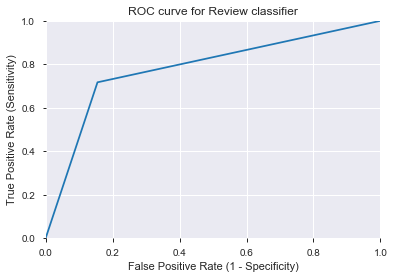

In [85]:
# Plotting the ROC curve
from sklearn import metrics
fpr, tpr ,thresholds = metrics.roc_curve(Y1_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Review classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [87]:
#Testing some sample sentences
print(rf.predict(["The food is fucking awesome."]))
print(rf.predict(['The food is fucking disappointing']))
print([rf.predict(['This restaurant is so bad'])])
print(rf.predict(["The restaurant does an awesome job at a bad taste."]))

[1]
[0]
[array([0])]
[0]


In [82]:
#2 - SVM using pipelines (TF-IDF approach)
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])
clf.fit(X1_train, Y1_train)
y_pred = clf.predict(X1_test)
print(confusion_matrix(Y1_test, y_pred))
print(classification_report(Y1_test, y_pred))

[[6564  936]
 [1039 6461]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7500
           1       0.87      0.86      0.87      7500

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



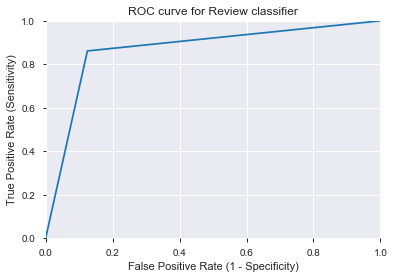

In [83]:
# Plotting the ROC curve
from sklearn import metrics
fpr, tpr ,thresholds = metrics.roc_curve(Y1_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Review classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [88]:
from spacy.lang.en import English
nlp = English()

In [89]:
#Testing some samples
print(clf.predict(["Food was bland."]))
print(clf.predict(["Ambience was good, but food was okay"]))
print(clf.predict(["The food was fucking awesome"]))
print(clf.predict(["Subway does an awesome job at a very bad taste."]))


[0]
[0]
[1]
[0]


In [91]:
#To find the named entities from the review.
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp("Subway does an awesome job at a very bad taste.")
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Subway ORG


In [89]:
#Bag of Words approach
from sklearn.feature_extraction.text import CountVectorizer  
cv = CountVectorizer()  
X = cv.fit_transform(corpus).toarray()
y = df.loc[:,'Label'].values

#Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [111]:
#Random Forest (Bag of Word approach)
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6306 1179]
 [2115 5400]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79      7485
           1       0.82      0.72      0.77      7515

    accuracy                           0.78     15000
   macro avg       0.78      0.78      0.78     15000
weighted avg       0.78      0.78      0.78     15000



In [78]:
#2 - SVM using pipelines (BOW approach)
from sklearn.feature_extraction.text import CountVectorizer  
X1_train, X1_test, Y1_train, Y1_test = train_test_split(df['review'], df['Label'], test_size = 0.3, random_state=0, shuffle = True, stratify=df['Label'])
clf = Pipeline([('count', CountVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])
clf.fit(X1_train, Y1_train)
y_pred = clf.predict(X1_test)
print(confusion_matrix(Y1_test, y_pred))
print(classification_report(Y1_test, y_pred))

[[6449 1051]
 [ 831 6669]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      7500
           1       0.86      0.89      0.88      7500

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000

